#  **Convolutional Neural Networks**

##  **Architecture of Convolutional Neural Networks**

* Convolutional Neural Networks (popularized by [Yann Lecun](https://en.wikipedia.org/wiki/Yann_LeCun)) are mainly designed to learn and perform tasks involving images;

\\


* CNN architecture is made up with $3$ types of layers:
  * **Convolutions** : learn filters;
  * **Pooling**: summarize filtered/convolved images;  
  * **Fully Connected**: perform traditional MLP transformations.

\\

![](https://drive.google.com/uc?export=view&id=11OTV6VzUL5tbChjo9OEimrZc4l0PsdTQ)


##  **Image Filtering (Convolution)**

* Image processing covers wide range of applications such as: Classification, Facial Recognition, Object Tracking, Autonomous vehicules


* Images are implemented as matrices where:
  * Gray images are represented with one matrix $\bf{X}$;
  * Colored images are represented with Tensors stacking 3 to 4 matrices associated to ***channels***: red, blue, green and transperancy;
  * Pixels in gray images correspond to each entry $\bf{X}[i,j]$ (respectively $\bf{X}[i,j,:,:]$ for coloured images).

  
\\

* Image filtering is any operation altering $\bf{X}$ in order to:
  * Modify the overall appearance of $\bf{X}$;
  * Bring up certain features such as contours, edges $\ldots$
* Filters come as matrices $\bf{F}$ whose dimensions are smaller than those of $\bf{X}$

\\

* Filtering $\bf{X}$ with $\bf{K}$ is known as operation of **convolution** which resolves to dot products between $\bf{X}$ and $\bf{K}$ on different regions of $\bf{X}$


\\

![](https://drive.google.com/uc?export=view&id=19Zd-Ad44c6aT6McqPoyTTtHF1OE3sQxU)






###  **Average Filtering**

* Below is an example of average filter for simple blurring effect

\\

$$
\bf{F_{avg}} = \frac{1}{9}
\begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1\\
\end{bmatrix}. 
$$

(-0.5, 452.5, 174.5, -0.5)

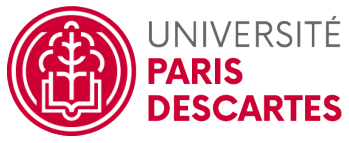

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
from PIL import Image 
import requests
import io

image_url =  "https://upload.wikimedia.org/wikipedia/fr/d/de/Logo_Paris_Descartes.png"
response = requests.get(image_url)
img = Image.open(io.BytesIO(response.content))

plt.imshow(img)
plt.axis('off')

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]]


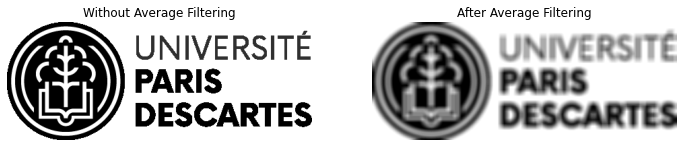

In [ ]:
img = img.convert('L')
img_np = np.array(img) 

def filter_and_print(img_np, f, title = '', figsize = (12,7)):

    img_np_f = cv2.filter2D(img_np, -1, f)
    
    fig, axes = plt.subplots(1,2, figsize = figsize)
    axes[0].imshow(img_np, cmap = 'gray')
    axes[0].set_title('Without ' + title)
    axes[0].axis('off')
    axes[1].imshow(img_np_f, cmap = 'gray')
    axes[1].set_title('After ' + title)
    axes[1].axis('off')

f = 10
f_avg = np.ones((f,f), np.float32)/(f**2)
print(f_avg)
filter_and_print(img_np, f_avg, title = 'Average Filtering' ,figsize = (12,7))


###  **Vertical Edge Filtering**

* Below is filter extracting vertical edges 

\\

\begin{equation}
\bf{F_v} =
\begin{bmatrix}
1 & 0 & -1\\
1 & 0 & -1\\
1 & 0 & -1\\
\end{bmatrix}.
\end{equation}

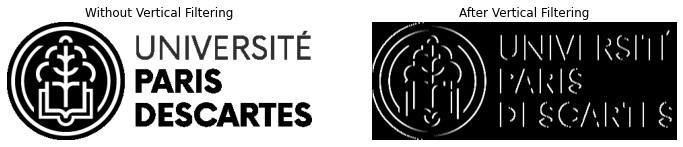

In [ ]:
f_v = np.array([[1,0,-1],
                [1,0,-1],
                [1,0,-1]])
filter_and_print(img_np, f_v, title = 'Vertical Filtering' ,figsize = (12,7))


###  **Horizontal Edge Filtering**

\\


* Below are examples of filters extracting vertical and horizontal edges

\\

\begin{equation}
\bf{F_h} =
\begin{bmatrix}
1 & 1 & 1\\
0 & 0 & 0\\
-1 & -1 & -1\\
\end{bmatrix}.
\end{equation}



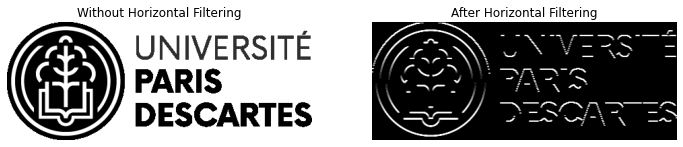

In [ ]:
f_h = np.array([[1,1,1],
                [0,0,0],
                [-1,-1,-1]])
filter_and_print(img_np, f_h, title = 'Horizontal Filtering' ,figsize = (12,7))

Text(0.5, 1.0, 'Filter Horizontal Edge')

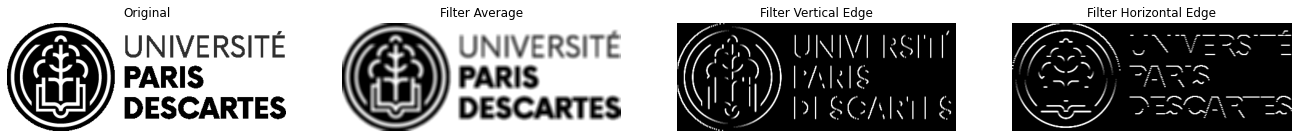

In [ ]:
fig, axes = plt.subplots(1,4, figsize = (23,13))

axes[0].imshow(img_np, cmap = 'gray')
axes[0].axis('off')
axes[0].set_title('Original')

axes[1].imshow(cv2.filter2D(img_np, -1, f_avg), cmap = 'gray')
axes[1].axis('off')
axes[1].set_title('Filter Average')

axes[2].imshow(cv2.filter2D(img_np, -1, f_v), cmap = 'gray')
axes[2].axis('off')
axes[2].set_title('Filter Vertical Edge')

axes[3].imshow(cv2.filter2D(img_np, -1, f_h), cmap = 'gray')
axes[3].axis('off')
axes[3].set_title('Filter Horizontal Edge')

##  **Convolution Layers**

###  **One Channel Image Case**

* Convolution represents the foundation of any CNN;

\\


* Each filter is defined by

    1. size $f \times f$: dimensions of $\bf{F}$;
    2. stride $s$: number of pixels $\bf{F}$ moves when applied on $\bf{X}$
    3. padding $p$: number of extra zeros added arround $\bf{X}$;
    
\\


#### **Convolution with** $f = 3,s = 1, p = 0:$

\\

![](https://drive.google.com/uc?export=view&id=1CzX19TwGDq1IdcEXSj44wsQbvArH7ww_)

![](https://drive.google.com/uc?export=view&id=1XX7TNtLgmfWpFzIVFo0X3blHlJc2MvSG)


\\

\\

#### **Convolution with** $f = 3,s = 2, p = 0:$
\\


![](https://drive.google.com/uc?export=view&id=1Ix6Cct5TxdIesaLiZR5nYSTbiyXyaG1n)

\\

\\

#### **Convolution with** $f = 3,s = 2, p = 1:$

\\

![](https://drive.google.com/uc?export=view&id=1DUzTamdF2uNWH_MhjDEfvLSun77uidcn)


\\

* Padding is often used to **preserve** the original resolution of $\bf{X}$; 

* When $p = 0$ the convolution is said to be **valid**;

* When $p > 0$ and preserves the original resolution of  $\bf{X}$, the convolution is said to be **same**. 

\\

* The relationship between convolved image and the original is given by:
  * Let $\bf{X}$ be an image of dimension $n \times n$;
  * Let $\bf{F}$ be filter of dimension $f \times f$;
  * Dimensions of the convolution $\bf{X} * \bf{F}$ is
  $$
  \left\lfloor \frac{n + 2p - f}{s}  \right\rfloor + 1.
  $$ 





###  **Multi Channel Image Case** 

* Convolution can be extended to colored images;


* The same principle is extended over the number of channels;


* It is known as **convolution over volume** but the result remains **single matrix**


\\

![](https://drive.google.com/uc?export=view&id=1jzygdpOr3gCfwF6TgG9KIBXKEqi-6XRv)




###  **Non Linear Filters** 

* Instead of **hand crafting** ad-hoc filters $\bf{F}$ like vertical and horizontal edge detector seen above, filters can be integrated into Neural Network as unknown $\bf{W}$ and get learned through backpropagation 

\\

\begin{equation}
\bf{W} =
\begin{bmatrix}
w_{11} & w_{12} & w_{13}\\
w_{21} & w_{22} & w_{23}\\
w_{31} & w_{32} & w_{33}\\
\end{bmatrix}.
\end{equation}

\\

* In order to **learn** sophisticated filters, $\bf{W}$ is wrapped with **non linear** activation functions (ReLu, sigmoid, $\ldots$).





###  **Convolution Layer** 

* Convolutional Layer are built upon **many** **learnable** filters $\bf{W}$


\\


![](https://drive.google.com/uc?export=view&id=1KUmzU8kC4frv__7AyLDRB8jthQ58N755)


\\

* Convolution layer is defined as affine transformations of different filters $\bf{W}$ wrapped with activation function

\\

![](https://drive.google.com/uc?export=view&id=1fhiLK_d3RUX-UlFf1eT27FbbUtg1O8eS)


\\



* Just like in MLPs, Convolution Layers can be chained one after the other before moving to the Fully Connected Layer as illustrated below

\\


![](https://drive.google.com/uc?export=view&id=1PqluIzGnaqwbJYtxpVgBXKMt3PnYxqvN)

##  **Pooling Layers** 

* Pooling layers are used to
    * Highlight specific features;
    * Make the model more robust to spatial changes;
    * Reduce dimension of intermediary representations in order to speed up calculations;

\\

* Just like convolution, Pooling requires:
    * size of the window into which pooling is computed $f \times f$;
    * strides of the window $s \times s$;
    * pooling operation: Max or Average

\\

![](https://drive.google.com/uc?export=view&id=1vmfXVmP4kJMktVK53PFEBCCaq3JKnCGI)


\\

* Pooling operations matrix-wise leading to **volume** preservation.

\\

* Pooling layers have no parameters.


## **Implementation of CNNs**

#### **Basic CNN Architecture**

* Most of CNNs are made up with Convolutional, Pooling and Fully Connected layers

\\

* Convolutional and Pooling layers process **spatial** aspect of data and  usually come in the order Conv/Pool;

\\


* Typical CNN is constructed by:
    1. Stacking spatial layers in order to extracts relevant features;
    2. Fully Connected layers to process extracted features through MLP; 


\\

* The rise of GPUs led to high interest in CNN research;
* Competitions like [ImageNet](http://www.image-net.org/) led to the developpement of many sophisticated CNNs;
* Most of these CNNs are open sourced and can be used as **feature extractors**;



#### **LeNet –5 (Architecture + Implementation)**

* Developped by Yann Lecun in 1999 for digit recognition (see paper [here](http://yann.lecun.com/exdb/publis/pdf/lecun-99.pdf));


* Number of parameters ~ 61K;

\\


![](https://drive.google.com/uc?export=view&id=12jKcSUk3SP-277eOYm-Hzds7J7FpmKpt)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model

input_layer = Input(shape = (32,32,1))
x = Conv2D(6,(5,5), activation = 'tanh')(input_layer)
x = AveragePooling2D(pool_size = (2,2), strides = (2,2), padding = 'valid')(x)
x = Conv2D(16, (5,5), activation = 'tanh')(x)
x = AveragePooling2D(pool_size = (2,2), strides = (2,2), padding = 'valid')(x)
x = Flatten()(x)
x = Dense(units = 120, activation = 'tanh')(x)
x = Dense(units = 84, activation = 'tanh')(x)
output_layer = Dense(units = 10, activation = 'softmax')(x)

leNet5 = Model(input_layer, output_layer)

In [ ]:
leNet5.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120 

#### **VGG16**

*  [VGG16](https://arxiv.org/pdf/1409.1556.pdf) was designed and won the Imagenet competition in 2014;

\\

* Although  it relies on $16$ layers, the architecture remains simple:
  * Convolution layers are made up with $3 \times 3$ filters with a stride 1;
  * Pooling layers are **Max** of size $2 \times 2$ with **same** padding and  stride of $2$;
  * MLP part is made up with $3$ Fully Connected layers with $4096$ neurons followed by a softmax for output;
  
* This network has about $138$ million parameters.



![](https://drive.google.com/uc?export=view&id=17vjpUSo5bHHOc85moxREFZWjhMGIyNoF)

##### **VGG16 in Keras**

* Input image $\bf{X}$ of shape  $244 \times 244$
* Output $\bf{y}$ with $2$ classes

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

base = VGG16(input_shape = (244,244,3), weights = None, include_top = True)
fc2 = base.layers[-2]
output_layer = Dense(2, activation = 'softmax')(fc2.output)

my_vgg16 = Model(base.input, output_layer)
my_vgg16.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 244, 244, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 244, 244, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 244, 244, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 122, 122, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 122, 122, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 122, 122, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 61, 61, 128)       0   

#### **Other Famous CNN Architectures**

##### **ResNet**

![](https://drive.google.com/uc?export=view&id=1boKXfkP3PI_Vm2LhSBv3sxQunb-BUvum)



##### **Inception**



* First proposed by Google in 2014 for the imageNet challenge;

* Number of parameters ~ 10 millions;

* Due to its success, v2 and v3 (with $43$ layers) have been developped


![](https://drive.google.com/uc?export=view&id=1W5SRY7lf3QRVSee3cTvlvKr8Ti8JOcdx)






## **Data Augmentation/Transfer Learning**

### **Data Augmentation**

* Type of regularization when data diversity is not available;

\\

* Data Augmentation consists in distoring original images through several operations like:
  * cropping;
  * rotating;
  * brightness alteration;

\\

* Class  [**ImageDataGenerator**](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) implements most data augmentation techniques  

(-0.5, 452.5, 174.5, -0.5)

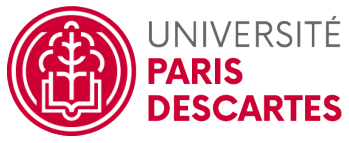

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
from PIL import Image 
import requests
import io

image_url =  "https://upload.wikimedia.org/wikipedia/fr/d/de/Logo_Paris_Descartes.png"
response = requests.get(image_url)
img = Image.open(io.BytesIO(response.content))

plt.imshow(img)
plt.axis('off')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(rescale = 1/255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True)

In [ ]:
transform_params = img_gen.get_random_transform((200,200))
print(transform_params)

{'theta': 0, 'tx': 0, 'ty': 0, 'shear': 0.15184184416919655, 'zx': 1.0322535124344507, 'zy': 0.835021438554769, 'flip_horizontal': 1, 'flip_vertical': 0, 'channel_shift_intensity': None, 'brightness': None}


(-0.5, 452.5, 174.5, -0.5)

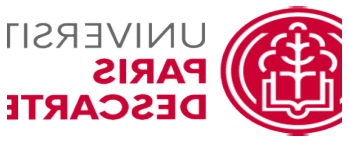

In [ ]:
img_aug = img_gen.apply_transform(np.array(img), transform_params)
plt.imshow(img_aug)
plt.axis('off')

* [**ImageDataGenerator**](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) can generate batches directly from the hard drive:
  * Each data category must be a folder containing all instances 

In [ ]:
#Example of Batch Generator + Data Augmentation

train_generator = img_gen.flow_from_directory(directory = os.path.join(data_path, 'my_dataset','Training'),
                                              target_size = (224,224),
                                              batch_size = 32,
                                              class_mode = 'binary')

img_gen = ImageDataGenerator()
valid_generator = img_gen.flow_from_directory(directory = os.path.join(data_path, 'my_dataset', 'Validation'),
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'binary')

hist = my_cnn.fit(train_generator,
                  steps_per_epoch = steps_per_epoch,
                  epochs = 100,
                  validation_data = valid_generator,
                  validation_steps = valid_steps_per_epoch,
                  workers = 10
                  )

### **Transfer Learning**

* Transfer Learning in Computer Vision consists in reusing pre-trained CNNs for another task;

* The principle is :
  * Inherit Conv/Pool layers as base extractor;
  * Add Fully Connected and softmax layers;
  * Freeze certain inheritted layers during training.

* Pretrained CNNs in Keras are listed at: https://keras.io/api/applications/ 

In [ ]:
from tensorflow.keras import applications

# This will load the whole VGG16 network, including the top Dense layers.
# Note: by specifying the shape of top layers, input tensor shape is forced
# to be (224, 224, 3), therefore you can use it only on 224x224 images.
vgg_model = applications.VGG16(weights='imagenet', include_top=True)

# If you are only interested in convolution filters. Note that by not
# specifying the shape of top layers, the input tensor shape is (None, None, 3),
# so you can use them for any size of images.
vgg_model = applications.VGG16(weights='imagenet', include_top=False)

# If you want to specify input tensor
from keras.layers import Input
input_tensor = Input(shape=(160, 160, 3))
vgg_model = applications.VGG16(weights='imagenet',
                               include_top=False,
                               input_tensor=input_tensor)

# To see the models' architecture and layer names, run the following
vgg_model.summary()

## **Application 1**

* Detection of face emotion

\\

* $7$ emotions to learn and predict:
  - 0: Angry
  - 1: Disgust 
  - 2: Fear
  - 3: Happy
  - 4: Sad
  - 5: Surprise 
  - 6: Neutral

\\

* Dataset downloadable at: https://drive.google.com/file/d/1Mu45czJuWlgW9zXefxXn4TLy2KPYsI2Z/view?usp=sharing



![](https://drive.google.com/uc?export=view&id=1aWpQMbdqIYcslbleF4NTeBrUPUVCmCiQ)
